## ** 기말고사 프로젝트 <기말고사 프로젝트 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project(기말고사).ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2021.11.29(월요일) ~ 2021.12.12(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -


### **1. Titanic 데이터를 사용하여 ``로지스틱 회귀분석(Logistic Regression)``,``의사결정트리(Decision Tree)``, ``랜덤포레스트(Randomforest)``, ``SVM(Support Vector Machine)``생성 모델을 만들고 생성한 모델을 Kaggle에 제출하여 점수를 획득 하시오.**

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 모델 생성에 필요한 전처리 과정을 진행 하시오.
2. 모든 모델의 생성 과정을 코드로 명시 하시오.
3. 적절한 반응변수와 설명변수를 설정 하시오
4. 주어진 Train set으로 모델을 생성하시오.
5. Feature selection(변수 선택), Hyperparameter 튜닝을 진행 하시오.
6. Test set을 이용한 Predict(예측)
7. 생성한 모델중 가장 높은 점수를 획득한 모델의 최고 점수를 Keggle에 올려 Keggle점수 이미지를 첨부하시오.
```

In [2]:
install.packages(c("tidyverse","data.table", "caret", "e1071", "Hmisc", "pROC"))

library(data.table)
library(tidyverse)
library(caret)
library(Hmisc)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘recipes’, ‘reshape2’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between()   masks dplyr::between()
✖ randomForest::

In [126]:
train <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble() ## train 데이터 

In [127]:
test <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv") %>%
 as_tibble() ## test 데이터 

#### **1. 로지스틱 회귀분석(Logistic Regression)**

In [153]:
train1<- train%>% na.omit()
train1<- select(train1, -PassengerId, -Name, -Cabin,-Ticket) %>% mutate_at(c("Survived","Sex","Embarked"),factor)
index <- caret::createDataPartition(y = train$Survived, p = 0.6, list = FALSE)
train1 <- train1[index, ]
test1 <- train1[-index, ]


#summary(train)
m<- glm(Survived~., data=train1, family="binomial")
m2<-step(m, direction = "backward")
summary(m2)

Start:  AIC=389.11
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Parch     1   371.21 387.21
- Fare      1   372.95 388.95
- Embarked  2   375.11 389.11
<none>          371.11 389.11
- SibSp     1   374.28 390.28
- Age       1   393.60 409.60
- Pclass    1   399.30 415.30
- Sex       1   464.88 480.88

Step:  AIC=387.21
Survived ~ Pclass + Sex + Age + SibSp + Fare + Embarked

           Df Deviance    AIC
- Fare      1   372.95 386.95
- Embarked  2   375.15 387.15
<none>          371.21 387.21
- SibSp     1   374.83 388.83
- Age       1   393.62 407.62
- Pclass    1   400.61 414.61
- Sex       1   469.01 483.01

Step:  AIC=386.95
Survived ~ Pclass + Sex + Age + SibSp + Embarked

           Df Deviance    AIC
<none>          372.95 386.95
- Embarked  2   377.36 387.36
- SibSp     1   375.90 387.90
- Age       1   397.13 409.13
- Pclass    1   427.76 439.76
- Sex       1   471.20 483.20



Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Embarked, 
    family = "binomial", data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1325  -0.6680  -0.3779   0.6476   2.5009  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.86691    0.73135   8.022 1.04e-15 ***
Pclass      -1.29525    0.19070  -6.792 1.10e-11 ***
Sexmale     -2.54069    0.28427  -8.938  < 2e-16 ***
Age         -0.04813    0.01039  -4.631 3.64e-06 ***
SibSp       -0.26742    0.15997  -1.672   0.0946 .  
EmbarkedQ   -1.91583    0.99669  -1.922   0.0546 .  
EmbarkedS   -0.35691    0.33647  -1.061   0.2888    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 565.67  on 421  degrees of freedom
Residual deviance: 372.95  on 415  degrees of freedom
  (113 observations deleted due to missingness)
AIC: 386.95

Number of Fisher Scoring iterations: 5


In [154]:
predict_value<-predict(m2, test1, type="response") %>% tibble(predict_value= .)
predict_value %>% show()

# A tibble: 217 × 1
   predict_value
           <dbl>
 1        0.0691
 2        0.762 
 3        0.721 
 4        0.466 
 5        0.581 
 6        0.489 
 7        0.127 
 8        0.556 
 9        0.871 
10        0.127 
# … with 207 more rows


In [155]:
predict_check <-test1 %>% select(Survived) %>% dplyr::bind_cols(., predict_value)
predict_check %>% show()

# A tibble: 217 × 2
   Survived predict_value
   <fct>            <dbl>
 1 0               0.0691
 2 1               0.762 
 3 0               0.721 
 4 0               0.466 
 5 1               0.581 
 6 0               0.489 
 7 0               0.127 
 8 0               0.556 
 9 1               0.871 
10 0               0.127 
# … with 207 more rows


In [156]:
predict_cutoff <- predict_check %>% mutate(predict_value_cutoff = as.factor(ifelse(predict_value > 0.5, 1, 0)))
predict_cutoff %>% show()

# A tibble: 217 × 3
   Survived predict_value predict_value_cutoff
   <fct>            <dbl> <fct>               
 1 0               0.0691 0                   
 2 1               0.762  1                   
 3 0               0.721  1                   
 4 0               0.466  0                   
 5 1               0.581  1                   
 6 0               0.489  0                   
 7 0               0.127  0                   
 8 0               0.556  1                   
 9 1               0.871  1                   
10 0               0.127  0                   
# … with 207 more rows


In [157]:
#test <-select(test, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"),factor
test<-na.omit(test)
as.tibble(test)
test$Age <-impute(test$Age ,median)
predict(m2, newdata = test, type ="response") %>% tibble(predict_survived= .) %>% bind_cols(test, .)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predict_survived
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0.01573696
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,0.28795675
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0.01530395
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0.09832419
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,0.57393905
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0.16934380
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q,0.20123357
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S,0.24231714
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C,0.75302140


In [ ]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

#### **2. 의사결정트리(Decision Tree)**

In [159]:
install.packages(c("rpart","rattle","rpart.plot"))
library(rpart)
library(rattle)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
rpart(formula = Sex ~ ., data = train1, method = "class")
  n=422 (113 observations deleted due to missingness)

          CP nsplit rel error    xerror       xstd
1 0.35616438      0 1.0000000 1.0000000 0.06693016
2 0.05479452      1 0.6438356 0.6438356 0.05854526
3 0.02054795      2 0.5890411 0.6849315 0.05982998
4 0.01712329      4 0.5479452 0.7328767 0.06121221
5 0.01369863      6 0.5136986 0.7465753 0.06158520
6 0.01000000     10 0.4589041 0.7328767 0.06121221

Variable importance
Survived     Fare      Age   Pclass    Parch    SibSp Embarked 
      37       22       13       10        7        6        4 

Node number 1: 422 observations,    complexity param=0.3561644
  predicted class=male    expected loss=0.3459716  P(node) =1
    class counts:   146   276
   probabilities: 0.346 0.654 
  left son=2 (166 obs) right son=3 (256 obs)
  Primary splits:
      Survived splits as  RL,           improve=52.816190, (0 missing)
      Fare     < 9.54375  to the right, improve=20.538

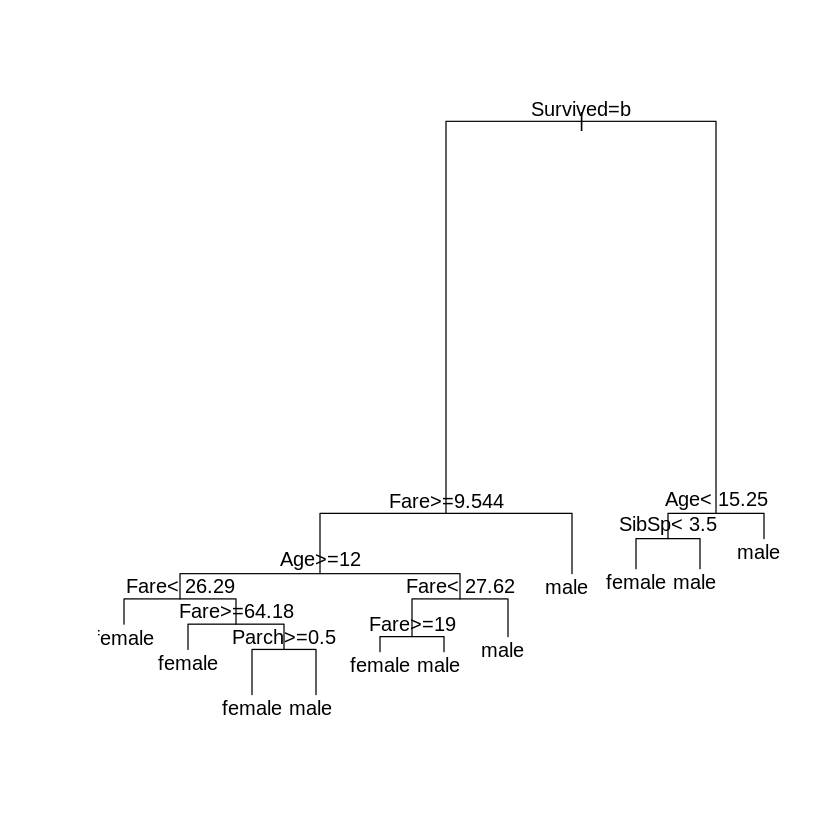

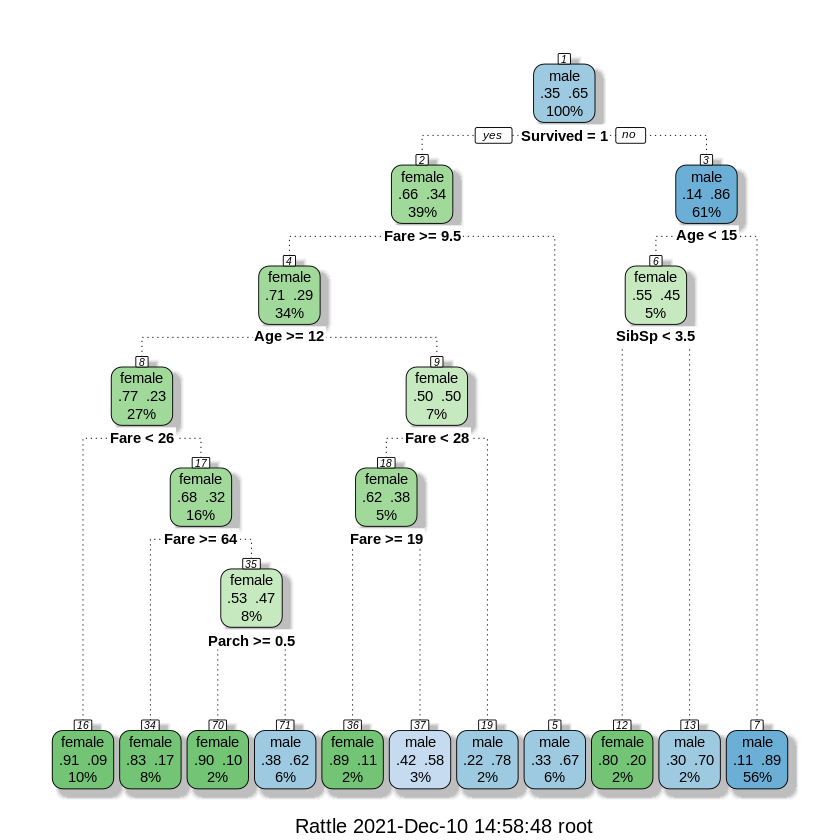

In [160]:
train_1<- rpart(formula= Sex~.,data=train1, method="class")
summary(train_1)
plot(train_1)
text(train_1)
fancyRpartPlot(train_1)


Classification tree:
rpart(formula = Sex ~ ., data = train1, method = "class")

Variables actually used in tree construction:
[1] Age      Fare     Parch    SibSp    Survived

Root node error: 146/422 = 0.34597

n=422 (113 observations deleted due to missingness)

        CP nsplit rel error  xerror     xstd
1 0.356164      0   1.00000 1.00000 0.066930
2 0.054795      1   0.64384 0.64384 0.058545
3 0.020548      2   0.58904 0.68493 0.059830
4 0.017123      4   0.54795 0.73288 0.061212
5 0.013699      6   0.51370 0.74658 0.061585
6 0.010000     10   0.45890 0.73288 0.061212


[1] 0.05479452

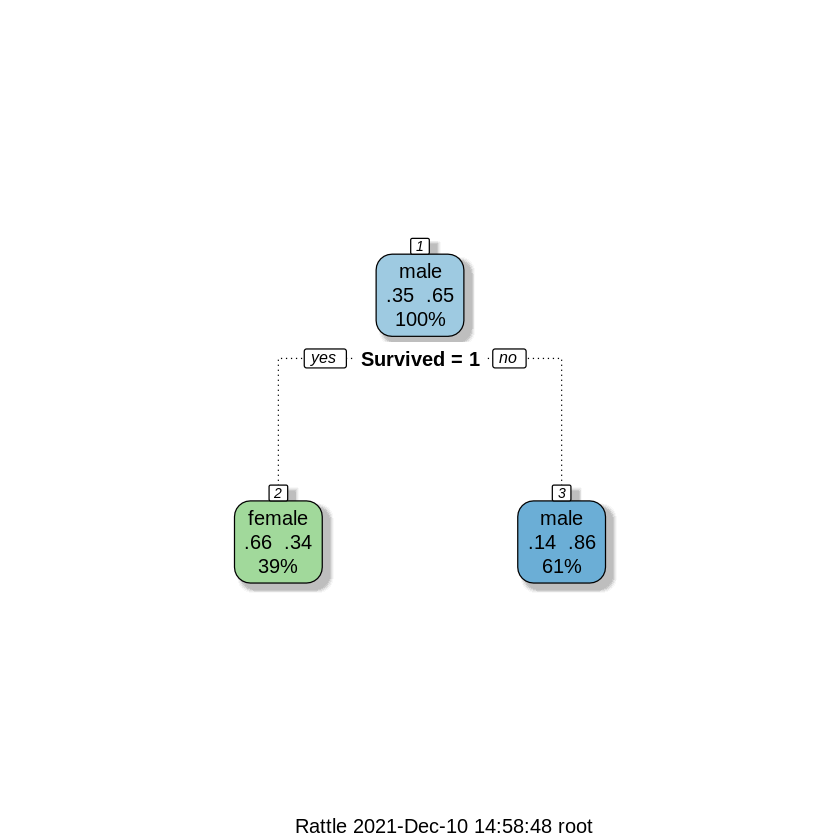

In [161]:
rpart:: printcp(train_1)
min_xerror_cp<-train_1$cptable %>% as_tibble()%>%filter(xerror== min(xerror)) %>% pull(CP)
min_xerror_cp
train_pr<-rpart::prune(train_1, cp= min_xerror_cp)
fancyRpartPlot(train_pr)

In [162]:
predict_value <- predict(train_pr, test1, type= "class") %>% 
 tibble(predict_value =. )
predict_check <- test1 %>% select(Survived) %>% dplyr:: bind_cols(., predict_value)

In [163]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

In [164]:
cm <- caret::confusionMatrix(predict_value$predict_value, test1$Survived)
draw_confusion_matrix(cm)

ERROR: ignored

#### **3. 랜덤포레스트(Randomforest)**

In [28]:
#install.packages("randomForest")
library(randomForest)
train1<-na.omit(train1)
summary(train1)
train_RF <- randomForest(Survived~. -1, data=train1, na.action = na.omit, importance=T, mtry=7,ntree=1000)
train_RF

 Survived     Pclass          Sex           Age            SibSp       
 0:378    Min.   :1.000   female:244   Min.   : 0.42   Min.   :0.0000  
 1:269    1st Qu.:1.000   male  :403   1st Qu.:20.75   1st Qu.:0.0000  
          Median :3.000                Median :28.00   Median :0.0000  
          Mean   :2.255                Mean   :29.67   Mean   :0.5116  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.0000  
          Max.   :3.000                Max.   :80.00   Max.   :5.0000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  8.05   C:120   
 Median :0.0000   Median : 15.50   Q: 22   
 Mean   :0.4127   Mean   : 34.34   S:503   
 3rd Qu.:1.0000   3rd Qu.: 31.85           
 Max.   :6.0000   Max.   :512.33           


Call:
 randomForest(formula = Survived ~ . - 1, data = train1, importance = T,      mtry = 7, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 20.56%
Confusion matrix:
    0   1 class.error
0 316  62   0.1640212
1  71 198   0.2639405

In [40]:
mtry_sqrt <- train1 %>% select (-1, Survived) %>% colnames() %>%
length %>% sqrt() %>% floor()
mtry_sqrt

[1] 2

In [30]:
set.seed(52)
train_RF <- randomForest(Survived~. -1, data=train1, na.action = na.omit, importance=T, mtry=mtry_sqrt,ntree=1000)
train_RF


Call:
 randomForest(formula = Survived ~ . - 1, data = train1, importance = T,      mtry = mtry_sqrt, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.7%
Confusion matrix:
    0   1 class.error
0 342  36   0.0952381
1  85 184   0.3159851

In [108]:
predict_value <- predict(train_RF, test1, type = "class") %>% 
 tibble(predict_value = .)
predict_check <- test1 %>% select(Age) %>% dplyr::bind_cols(., predict_value) 

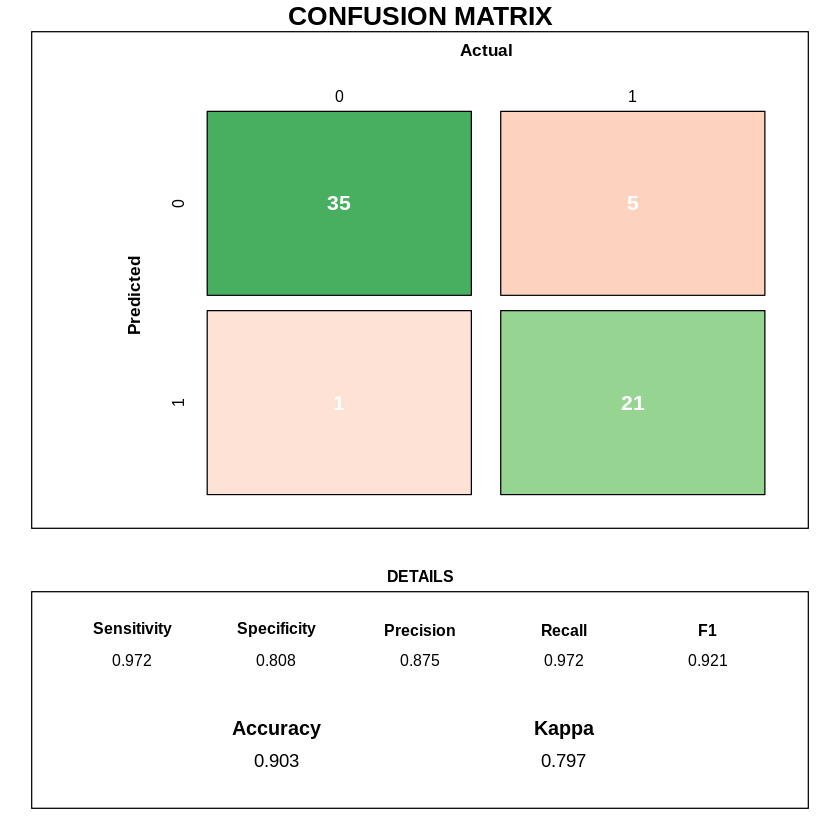

In [109]:
cm <- caret::confusionMatrix(predict_value$predict_value, test1$Survived)
draw_confusion_matrix(cm)

#### **4. SVM(Support Vector Machine)**

In [116]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [170]:
train1<- train%>% na.omit()
train1<- select(train1, -PassengerId, -Name, -Cabin,-Ticket) %>% mutate_at(c("Survived","Sex","Embarked"),factor)
index <- caret::createDataPartition(y = train1$Survived, p = 0.6, list = FALSE)
train1 <- train1[index, ]
test1 <- train1[-index, ]

In [171]:
svm_train<- e1071::svm(formula = Sex ~. , data= train1, type="C-classification",kernel = "radial")
summary(svm_train)


Call:
svm(formula = Sex ~ ., data = train1, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  223

 ( 109 114 )


Number of Classes:  2 

Levels: 
 female male




In [172]:
svm_train2<-e1071::svm(formula = Sex~., data=train1, type="C-classification", kernel="radial", cost=1000, gamma=0.1)
summary(svm_train2)


Call:
svm(formula = Sex ~ ., data = train1, type = "C-classification", 
    kernel = "radial", cost = 1000, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  180

 ( 88 92 )


Number of Classes:  2 

Levels: 
 female male




In [173]:
predict_value <- predict(svm_train, test1) %>% 
tibble(predict_value= . )
predict_check <- test1 %>% select(Sex) %>% dplyr::bind_cols(., predict_value)
predict_check %>% show()

# A tibble: 175 × 2
   Sex    predict_value
   <fct>  <fct>        
 1 female female       
 2 male   male         
 3 female female       
 4 male   female       
 5 female male         
 6 female female       
 7 male   male         
 8 female male         
 9 male   male         
10 male   male         
# … with 165 more rows


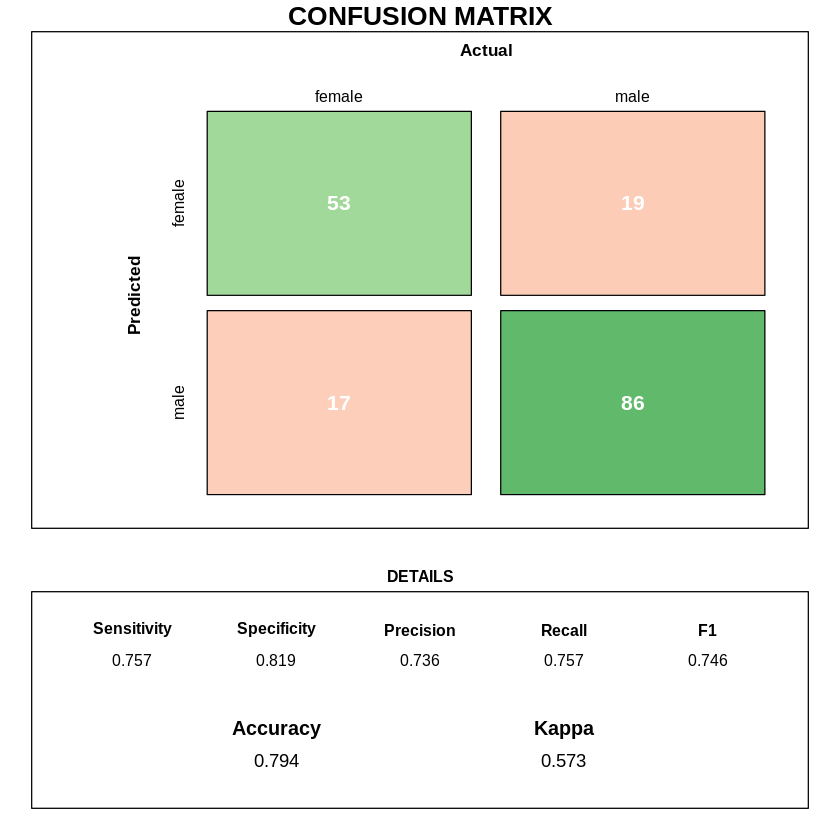

In [179]:
cm <- caret::confusionMatrix(predict_value$predict_value, test1$Sex)
draw_confusion_matrix(cm)

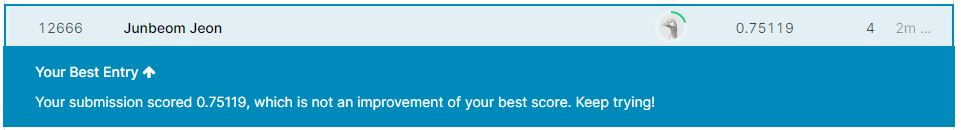

https://www.kaggle.com/c/titanic/rules 

에 접속하여 자신의 submission.csv를 등록하여 점수를 획득 하세요.